In [1]:
import tensorflow as tf

In [2]:
tf.version

<module 'tensorflow._api.v2.version' from '/Users/shivakumarmangina/miniconda3/envs/handwritten-digits/lib/python3.12/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train.shape ,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
matrix_data = x_train[0]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x3277a5df0>, 4)

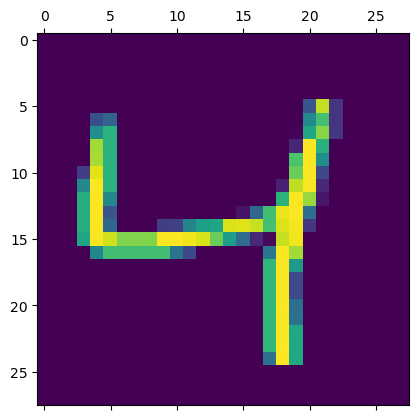

In [21]:
plt.matshow(x_train[2]),y_train[2]

In [8]:
tf.keras.__version__

'3.6.0'

In [63]:
keras = tf.keras
layers = keras.layers

In [69]:
model = model = keras.Sequential()


In [70]:
model.add(layers.Dense(units=64, activation='sigmoid', input_shape=(784,)))
# model.add(layers.Dense(units=10, activation='relu'))
# model.add(layers.Dense(units=1, activation='sigmoid'))
          

In [71]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
x_train_flatten = x_train.reshape(len(x_train),28*28) / 255
x_train_flatten.shape, y_train

((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [73]:
model.fit(x_train_flatten, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.8023 - loss: 0.8234
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.9138 - loss: 0.3079
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.9201 - loss: 0.2884
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 0.9230 - loss: 0.2752
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.9263 - loss: 0.2615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 0.9262 - loss: 0.2626
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.9297 - loss: 0.2516
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.9282 - loss: 0.2598
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.9303 - loss: 0.2499
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.9329 - loss: 0.2455


In [74]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,722 (588.76 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,482 (392.51 KB)

In [78]:
x_test_flattend = x_test.reshape(len(x_test),28*28) / 255
model.evaluate(x_test_flattend,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.9163 - loss: 0.3030


[0.26516446471214294, 0.9271000027656555]

In [80]:
y_predicted = model.predict(x_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


(2, <matplotlib.image.AxesImage at 0x3be216ea0>)

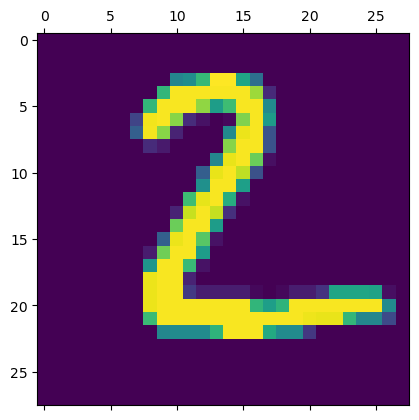

In [87]:
np.argmax(y_predicted[1]),plt.matshow(x_test[1])


In [96]:
tf.math.confusion_matrix(y_test, np.argmax(y_predicted,axis=1))


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    6,    9,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    8,  938,   16,    6,    3,   11,    8,   32,    5],
       [   3,    0,   18,  934,    0,   18,    3,   10,   16,    8],
       [   1,    2,    6,    2,  903,    0,   11,    4,    8,   45],
       [   8,    2,    4,   43,    6,  774,   15,    7,   26,    7],
       [  10,    3,   10,    1,    7,    9,  916,    1,    1,    0],
       [   1,    7,   23,   10,    5,    1,    0,  948,    2,   31],
       [   7,   12,    7,   27,    8,   28,   11,   11,  852,   11],
       [  11,    8,    1,   11,   16,    6,    0,   21,    4,  931]],
      dtype=int32)>

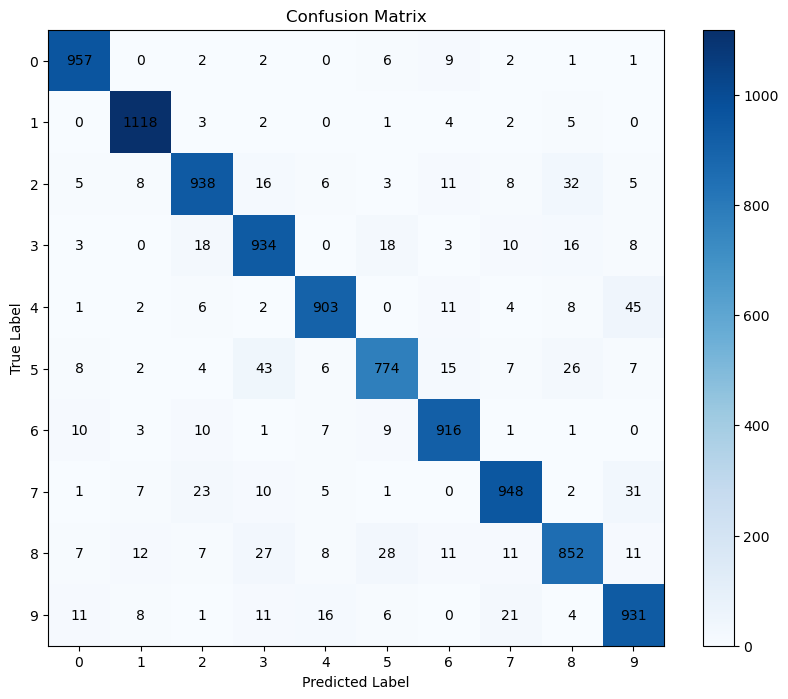

In [97]:
# Get predictions as class labels
y_pred = np.argmax(y_predicted, axis=1)

# Create confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)

# Create figure and axes
plt.figure(figsize=(10, 8))

# Plot confusion matrix
plt.imshow(conf_matrix, cmap='Blues')

# Add colorbar
plt.colorbar()

# Add numbers to each cell
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(conf_matrix[i, j].numpy()),
                ha='center', va='center')

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add ticks
plt.xticks(range(10))
plt.yticks(range(10))

plt.show()